**Air quality index prediction using machine learning**

**Problem statement**

Air pollution has become a major concern in urban areas due to rapid industrialization, vehicle emissions, and population growth. High levels of pollutants such as PM2.5, NO₂, and CO adversely affect human health and the environment. Predicting the Air Quality Index (AQI) using data-driven and machine learning techniques helps in identifying pollution trends, understanding key contributing factors, and forecasting future air quality.


**Objectives**

1.	Predict aqi based on pollutants
2.	Identify major factors affecting air quality
3.	Visualize and analyze pollution trends


**Dataset description**

Dataset source (Kaggle: Air quality index India)

Number of records 	: 974

Number of features 	: 11


**Key columns**

StationId	: Unique ID of station

Date	    : Data recorded date

PM2.5	    : Fine particulate pollution level

NO	        : Nitric oxide concentration

NO2	        : Nitrogen dioxide level

NOx	        : Total nitrogen oxides amount

NH3	        : Ammonia gas concentration

CO	        : Carbon monoxide amount

SO2	        : Sulphur dioxide level

AQI	        : Air quality index value

AQI_Bucket	: Air quality category name


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   974 non-null    object 
 1   Date        974 non-null    object 
 2   PM2.5       970 non-null    float64
 3   NO          970 non-null    float64
 4   NO2         970 non-null    float64
 5   NOx         970 non-null    float64
 6   NH3         970 non-null    float64
 7   CO          971 non-null    float64
 8   SO2         971 non-null    float64
 9   AQI         959 non-null    float64
 10  AQI_Bucket  959 non-null    object 
dtypes: float64(8), object(3)
memory usage: 83.8+ KB


In [4]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
df=df.drop(['StationId','AQI_Bucket'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    974 non-null    object 
 1   PM2.5   970 non-null    float64
 2   NO      970 non-null    float64
 3   NO2     970 non-null    float64
 4   NOx     970 non-null    float64
 5   NH3     970 non-null    float64
 6   CO      971 non-null    float64
 7   SO2     971 non-null    float64
 8   AQI     959 non-null    float64
dtypes: float64(8), object(1)
memory usage: 68.6+ KB


In [7]:
df.shape

(974, 9)

In [8]:
df['Date'].duplicated().sum()

0

In [9]:
df['Date'].isnull().any()

False

In [10]:
df.head(20)

,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,AQI
0,01-11-2017,67.35,22.49,62.52,50.87,49.69,0.56,7.05,110.0
1,02-11-2017,62.21,21.87,48.76,43.16,47.81,0.73,6.00,146.0
2,03-11-2017,97.96,29.60,47.41,48.63,60.30,0.92,10.00,117.0
3,04-11-2017,135.34,35.69,48.96,59.06,49.67,1.01,8.96,306.0
4,05-11-2017,102.10,59.95,62.20,88.76,59.49,1.27,15.37,251.0
5,06-11-2017,181.43,109.45,66.22,122.96,88.04,1.63,17.34,334.0
6,07-11-2017,397.79,21.19,74.12,55.97,64.87,1.76,10.37,431.0
7,08-11-2017,417.33,30.90,79.45,66.53,69.10,2.88,21.54,492.0
8,09-11-2017,325.10,34.06,80.97,69.86,67.40,1.93,19.92,512.0
9,10-11-2017,321.83,55.88,66.42,79.66,62.54,2.31,21.38,472.0


In [11]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    974 non-null    datetime64[ns]
 1   PM2.5   970 non-null    float64       
 2   NO      970 non-null    float64       
 3   NO2     970 non-null    float64       
 4   NOx     970 non-null    float64       
 5   NH3     970 non-null    float64       
 6   CO      971 non-null    float64       
 7   SO2     971 non-null    float64       
 8   AQI     959 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 68.6 KB


In [13]:
df['Year']=df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df=df.drop(['Date'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   970 non-null    float64
 1   NO      970 non-null    float64
 2   NO2     970 non-null    float64
 3   NOx     970 non-null    float64
 4   NH3     970 non-null    float64
 5   CO      971 non-null    float64
 6   SO2     971 non-null    float64
 7   AQI     959 non-null    float64
 8   Year    974 non-null    int32  
 9   Month   974 non-null    int32  
 10  Day     974 non-null    int32  
dtypes: float64(8), int32(3)
memory usage: 72.4 KB


In [16]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI', 'Year', 'Month',
       'Day'],
      dtype='object')

**HANDLING MISSING DATA**

In [17]:
a=['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI',]
for i in a:
    df[i]=df[i].fillna(df[i].mean())
    print(i)

PM2.5
NO
NO2
NOx
NH3
CO
SO2
AQI


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   974 non-null    float64
 1   NO      974 non-null    float64
 2   NO2     974 non-null    float64
 3   NOx     974 non-null    float64
 4   NH3     974 non-null    float64
 5   CO      974 non-null    float64
 6   SO2     974 non-null    float64
 7   AQI     974 non-null    float64
 8   Year    974 non-null    int32  
 9   Month   974 non-null    int32  
 10  Day     974 non-null    int32  
dtypes: float64(8), int32(3)
memory usage: 72.4 KB


In [19]:
df.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,AQI,Year,Month,Day
0,67.35,22.49,62.52,50.87,49.69,0.56,7.05,110.0,2017,11,1
1,62.21,21.87,48.76,43.16,47.81,0.73,6.00,146.0,2017,11,2
2,97.96,29.60,47.41,48.63,60.30,0.92,10.00,117.0,2017,11,3
3,135.34,35.69,48.96,59.06,49.67,1.01,8.96,306.0,2017,11,4
4,102.10,59.95,62.20,88.76,59.49,1.27,15.37,251.0,2017,11,5


In [20]:
df.describe()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,AQI,Year,Month,Day
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,103.403711,19.882619,45.152433,36.725320,43.426454,0.931504,14.552966,206.507821,2018.687885,6.273101,15.699179
std,71.577374,25.240280,21.617974,29.151555,26.710351,0.529674,9.076512,112.304725,0.846440,3.561723,8.804188
min,10.970000,2.300000,6.870000,0.000000,3.890000,0.000000,0.290000,25.000000,2017.000000,1.000000,1.000000
25%,56.490000,6.257500,27.370000,19.145000,23.337500,0.610000,8.752500,104.000000,2018.000000,3.000000,8.000000
50%,86.340000,10.540000,42.810000,28.710000,37.040000,0.820000,12.375000,196.000000,2019.000000,6.000000,16.000000
75%,130.607500,21.102500,58.735000,44.120000,57.970000,1.120000,18.170000,301.750000,2019.000000,10.000000,23.000000
max,570.970000,217.560000,126.280000,238.820000,228.910000,3.590000,92.830000,568.000000,2020.000000,12.000000,31.000000


**FINDING CORRELATION BETWEEN ALL FEATURES AND TARGET**

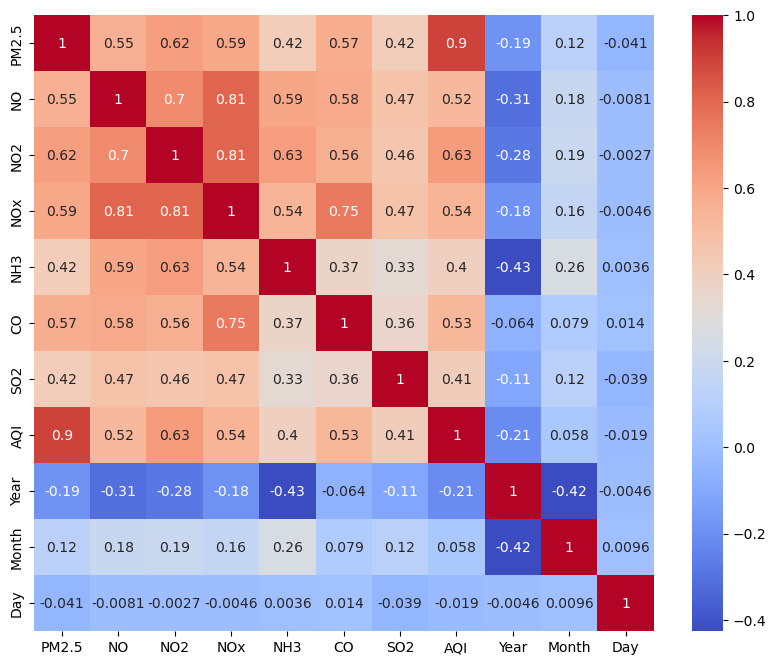

In [21]:
df_corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [22]:
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI', 'Year', 'Month',
       'Day'],
      dtype='object')


**OUTLIERS**


In [23]:
from scipy import stats
import numpy as np

PM2.5


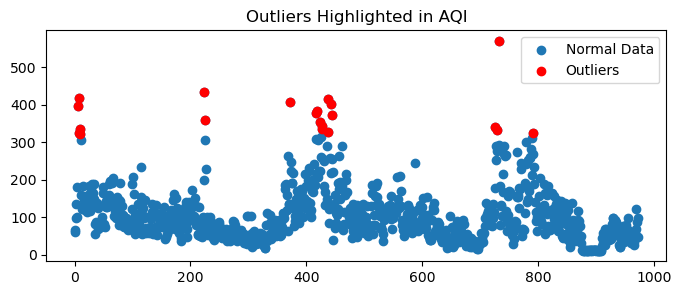

NO


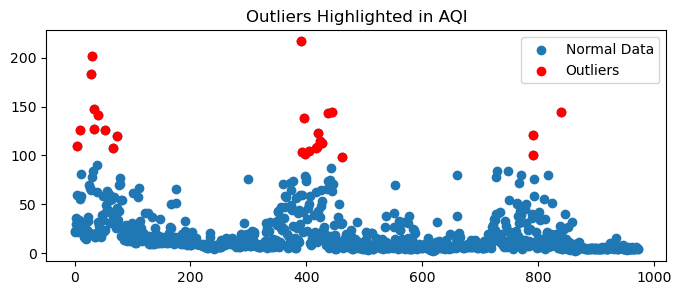

NO2


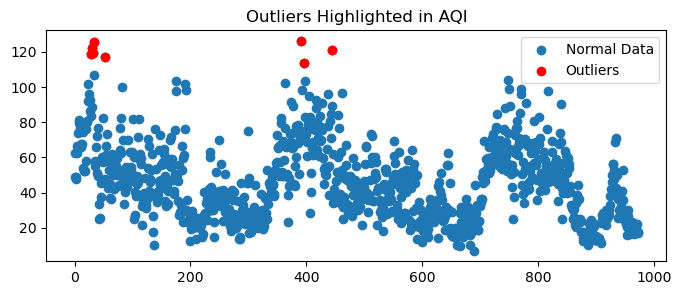

NOx


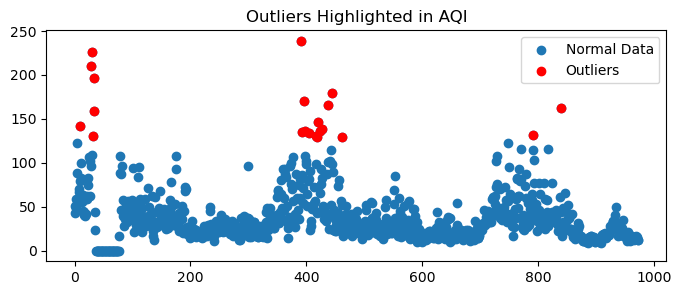

NH3


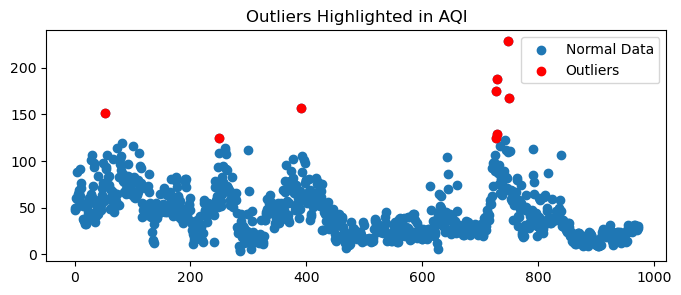

CO


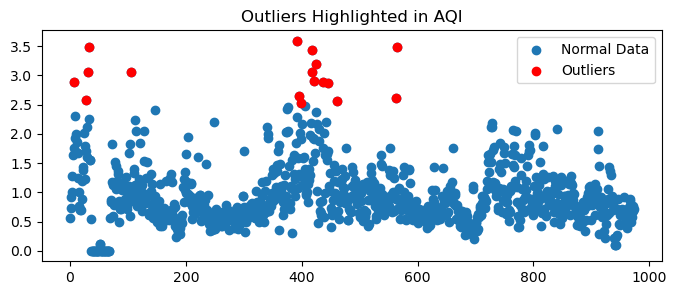

SO2


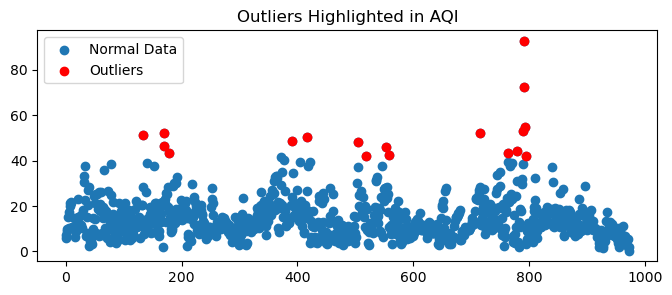

AQI


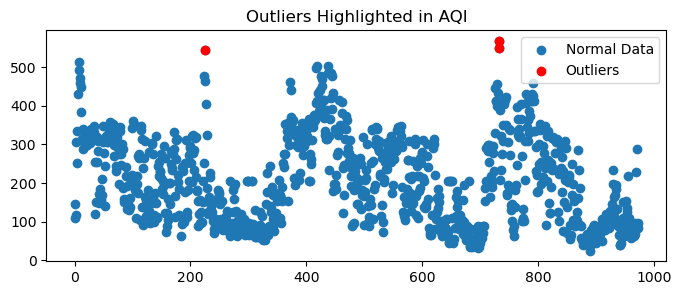

In [24]:
a=['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'AQI']
for i in a:
    z = np.abs(stats.zscore(df[i]))
    outliers = df[z > 3]
    print(i)
    plt.figure(figsize=(8,3))
    plt.scatter(df.index, df[i], label='Normal Data')
    plt.scatter(outliers.index, outliers[i], color='red', label='Outliers')
    plt.legend()
    plt.title('Outliers Highlighted in AQI')
    plt.show()

In [25]:
df.describe()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,AQI,Year,Month,Day
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,103.403711,19.882619,45.152433,36.725320,43.426454,0.931504,14.552966,206.507821,2018.687885,6.273101,15.699179
std,71.577374,25.240280,21.617974,29.151555,26.710351,0.529674,9.076512,112.304725,0.846440,3.561723,8.804188
min,10.970000,2.300000,6.870000,0.000000,3.890000,0.000000,0.290000,25.000000,2017.000000,1.000000,1.000000
25%,56.490000,6.257500,27.370000,19.145000,23.337500,0.610000,8.752500,104.000000,2018.000000,3.000000,8.000000
50%,86.340000,10.540000,42.810000,28.710000,37.040000,0.820000,12.375000,196.000000,2019.000000,6.000000,16.000000
75%,130.607500,21.102500,58.735000,44.120000,57.970000,1.120000,18.170000,301.750000,2019.000000,10.000000,23.000000
max,570.970000,217.560000,126.280000,238.820000,228.910000,3.590000,92.830000,568.000000,2020.000000,12.000000,31.000000


In [26]:
df.shape

(974, 11)

In [27]:
df.head(5)

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,AQI,Year,Month,Day
0,67.35,22.49,62.52,50.87,49.69,0.56,7.05,110.0,2017,11,1
1,62.21,21.87,48.76,43.16,47.81,0.73,6.00,146.0,2017,11,2
2,97.96,29.60,47.41,48.63,60.30,0.92,10.00,117.0,2017,11,3
3,135.34,35.69,48.96,59.06,49.67,1.01,8.96,306.0,2017,11,4
4,102.10,59.95,62.20,88.76,59.49,1.27,15.37,251.0,2017,11,5


**SEPERATING FEATURES AND TARGET FOR TRAIN AND TEST**

In [28]:
from sklearn.model_selection import train_test_split
X=df.drop('AQI',axis=1)
y=df['AQI']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [30]:
print(f"xtrain {X_train.shape}")
print(f"xtest {X_test.shape}")

xtrain (779, 10)
xtest (195, 10)


**MODEL SELECTION**

In [31]:
model1=KNeighborsRegressor()
model2=LinearRegression()
model3=DecisionTreeRegressor()
model4=RandomForestRegressor()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**KNeighborsRegressor**

KNeighborsRegressor
Mean Squared error: 1532.4321058059177
Mean Absolute Error(MAE): 27.0737498997353
R.squard (R2): 0.8671843016036965
MAPE: 20.04 %
First actual value: 291.0
predict 273.2



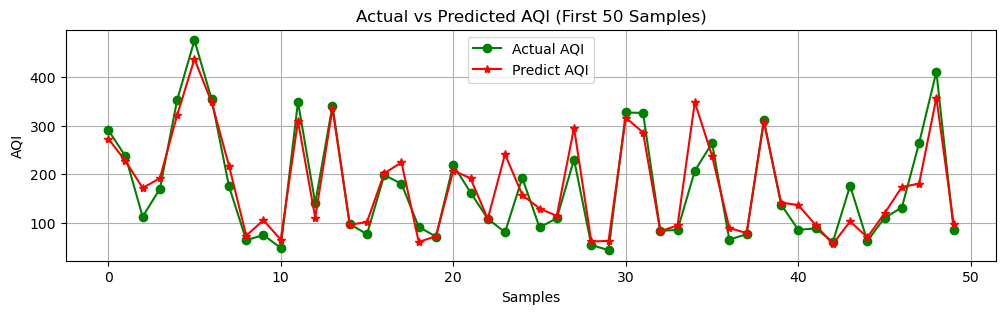

In [ ]:
print("KNeighborsRegressor")
model1.fit(X_train,y_train)
y_pred =model1.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(y_test,y_pred))
print("R.squard (R2):",r2_score(y_test,y_pred))
print("MAPE:", round(mape, 2), "%")
print("First actual value:", y_test.iloc[0])
print("predict", y_pred[0])
print()
y_test_11 = y_test[:50]
y_pred_11 = y_pred[:50]
sample_index = np.arange(0,50)
plt.figure(figsize=(12,3))
plt.plot(sample_index,y_test_11,label='Actual AQI', color='green', marker='o')
plt.plot(sample_index,y_pred_11,label='Predict AQI', color='red', marker='*')
plt.title('Actual vs Predicted AQI (First 50 Samples)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**LinearRegression**

LinearRegression
Mean Squared error: 1826.4756351903168
Mean Absolute Error(MAE): 34.373725638484586
R.squard (R2): 0.8416995857940102
MAPE: 25.59 %
First actual value: 291.0
predict 229.68616033763465



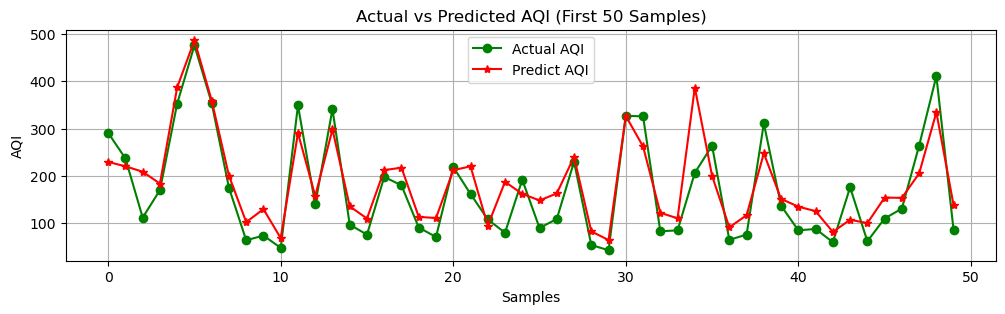

In [34]:
print("LinearRegression")
model2.fit(X_train,y_train)
y_pred =model2.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(y_test,y_pred))
print("R.squard (R2):",r2_score(y_test,y_pred))
print("MAPE:", round(mape, 2), "%")
print("First actual value:", y_test.iloc[0])
print("predict", y_pred[0])
print()
y_test_11 = y_test[:50]
y_pred_11 = y_pred[:50]
sample_index = np.arange(0,50)
plt.figure(figsize=(12,3))
plt.plot(sample_index,y_test_11,label='Actual AQI', color='green', marker='o')
plt.plot(sample_index,y_pred_11,label='Predict AQI', color='red', marker='*')
plt.title('Actual vs Predicted AQI (First 50 Samples)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**DesionTree**

DesionTree
Mean Squared error: 2454.48181190139
Mean Absolute Error(MAE): 34.666666666666664
R.squard (R2): 0.78727036922966
MAPE: 22.82 %
First actual value: 291.0
predict 297.0



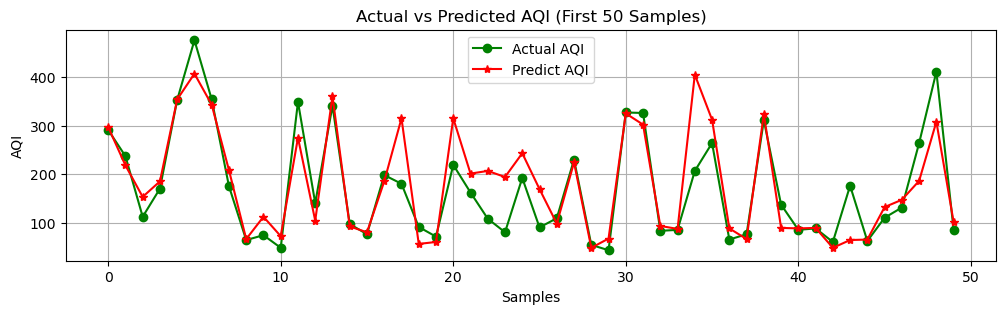

In [ ]:
print("DesionTree")
model3.fit(X_train,y_train)
y_pred =model3.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(y_test,y_pred))
print("R.squard (R2):",r2_score(y_test,y_pred))
print("MAPE:", round(mape, 2), "%")
print("First actual value:", y_test.iloc[0])
print("predict", y_pred[0])
print()
y_test_11 = y_test[:50]
y_pred_11 = y_pred[:50]
sample_index = np.arange(0,50)
plt.figure(figsize=(12,3))
plt.plot(sample_index,y_test_11,label='Actual AQI', color='green', marker='o')
plt.plot(sample_index,y_pred_11,label='Predict AQI', color='red', marker='*')
plt.title('Actual vs Predicted AQI (First 50 Samples)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest**

RandomForest
Mean Squared error: 1476.750874555138
Mean Absolute Error(MAE): 25.166771583647492
R.squard (R2): 0.8720101869320708
MAPE: 17.89 %
First actual value: 291.0
predict 284.63



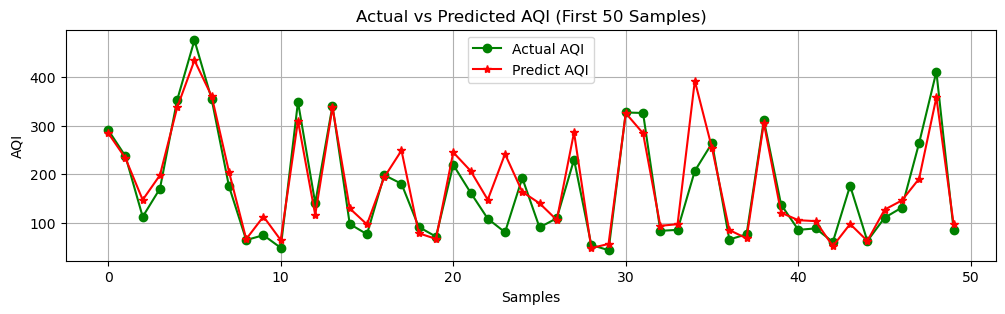

In [36]:
print("RandomForest")
model4.fit(X_train,y_train)
y_pred =model4.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(y_test,y_pred))
print("R.squard (R2):",r2_score(y_test,y_pred))
print("MAPE:", round(mape, 2), "%")
print("First actual value:", y_test.iloc[0])
print("predict", y_pred[0])
print()
y_test_11 = y_test[:50]
y_pred_11 = y_pred[:50]
sample_index = np.arange(0,50)
plt.figure(figsize=(12,3))
plt.plot(sample_index,y_test_11,label='Actual AQI', color='green', marker='o')
plt.plot(sample_index,y_pred_11,label='Predict AQI', color='red', marker='*')
plt.title('Actual vs Predicted AQI (First 50 Samples)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


**HYPER-PARAMETER TUNING FOR RANDOM_FOREST MODEL**


In [37]:
model_check=RandomForestRegressor(random_state=42)

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],         
    'max_depth': [5, 10, 15, 20, 30, None],           
    'min_samples_split': [2, 5, 10, 15],              
    'min_samples_leaf': [1, 2, 4, 6, 8],                    
    'max_features': ['sqrt', 'log2', 1.0, 0.7, 0.5],  
    'max_leaf_nodes': [None, 10, 20, 50, 100],       
    'bootstrap': [True],                                                                                                                             
    'max_samples': [None, 0.7, 0.8, 0.9]              
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_check,
    param_distributions=param_grid,
    n_iter=20,            
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_samples': 0.7, 'max_leaf_nodes': 100, 'max_features': 1.0, 'max_depth': 10, 'bootstrap': True}


In [40]:
best_model2=RandomForestRegressor(n_estimators=100, min_samples_split=15, min_samples_leaf=8, max_samples= 0.7, max_leaf_nodes=100, max_features= 1.0, max_depth= 10, bootstrap= True)

BestModel_RandomForest
Mean Squared error: 1334.4285124228816
Mean Absolute Error(MAE): 24.10862051141008
R.squard (R2): 0.8843452482064925
MAPE: 17.0 %
First actual value: 291.0
predict 285.2714743165668



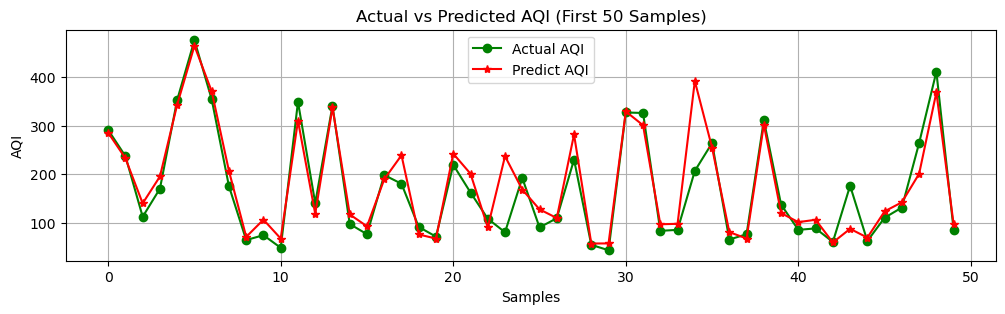

In [41]:
print("BestModel_RandomForest")
best_model2.fit(X_train,y_train)
y_pred =best_model2.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Squared error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error(MAE):",mean_absolute_error(y_test,y_pred))
print("R.squard (R2):",r2_score(y_test,y_pred))
print("MAPE:", round(mape, 2), "%")
print("First actual value:", y_test.iloc[0])
print("predict", y_pred[0])
print()
y_test_11 = y_test[:50]
y_pred_11 = y_pred[:50]
sample_index = np.arange(0,50)
plt.figure(figsize=(12,3))
plt.plot(sample_index,y_test_11,label='Actual AQI', color='green', marker='o')
plt.plot(sample_index,y_pred_11,label='Predict AQI', color='red', marker='*')
plt.title('Actual vs Predicted AQI (First 50 Samples)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model2, X, y, cv=5, scoring='r2')
print("Cross-Validation R2:", scores)
print("Mean R2:", scores.mean())

Cross-Validation R2: [0.86061282 0.863348   0.86392711 0.89178478 0.91091194]
Mean R2: 0.8781169290707431



**ACTUAL VS PREDICTED VS FUTURE**


In [43]:
#PREDICTED
import pandas as pd
manual_input = {
    'PM2.5': [67.35,62.21,97.96,135.34,102.1,181.43,397.79,417.33,325.1,321.83],
    'NO': [22.49,21.87,29.6,35.69,59.95,109.45,21.19,30.9,34.06,55.88],
    'NO2': [62.52,48.76,47.41,48.96,62.2,66.22,74.12,79.45,80.97,66.42],
    'NOx': [50.87,43.16,48.63,59.06,88.76,122.96,55.97,66.53,69.86,79.66],
    'NH3': [49.69,47.81,60.3,49.67,59.49,88.04,64.87,69.1,67.4,62.54],
    'CO': [0.56,0.73,0.92,1.01,1.27,1.63,1.76,2.88,1.93,2.31],
    'SO2': [7.05,6,10,8.96,15.37,17.34,10.37,21.54,19.92,21.38],
    'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017],
    'Month': [11,11,11,11,11,11,11,11,11,11],
    'Day': [1,2,3,4,5,6,7,8,9,10]
}
manual_df = pd.DataFrame(manual_input)
predicted_aqi = best_model2.predict(manual_df)
manual_df['Predicted_AQI'] = predicted_aqi
print(manual_df)

    PM2.5      NO    NO2     NOx    NH3    CO    SO2  Year  Month  Day  \
0   67.35   22.49  62.52   50.87  49.69  0.56   7.05  2017     11    1   
1   62.21   21.87  48.76   43.16  47.81  0.73   6.00  2017     11    2   
2   97.96   29.60  47.41   48.63  60.30  0.92  10.00  2017     11    3   
3  135.34   35.69  48.96   59.06  49.67  1.01   8.96  2017     11    4   
4  102.10   59.95  62.20   88.76  59.49  1.27  15.37  2017     11    5   
5  181.43  109.45  66.22  122.96  88.04  1.63  17.34  2017     11    6   
6  397.79   21.19  74.12   55.97  64.87  1.76  10.37  2017     11    7   
7  417.33   30.90  79.45   66.53  69.10  2.88  21.54  2017     11    8   
8  325.10   34.06  80.97   69.86  67.40  1.93  19.92  2017     11    9   
9  321.83   55.88  66.42   79.66  62.54  2.31  21.38  2017     11   10   

   Predicted_AQI  
0     130.876025  
1     123.200727  
2     197.513183  
3     304.756326  
4     233.749148  
5     345.933522  
6     477.993369  
7     477.097712  
8     475.3467

In [44]:
#FUTURE
import pandas as pd
manual_input2 = {
    'PM2.5': [67.35,62.21,97.96,135.34,102.1,181.43,397.79,417.33,325.1,321.83],
    'NO': [22.49,21.87,29.6,35.69,59.95,109.45,21.19,30.9,34.06,55.88],
    'NO2': [62.52,48.76,47.41,48.96,62.2,66.22,74.12,79.45,80.97,66.42],
    'NOx': [50.87,43.16,48.63,59.06,88.76,122.96,55.97,66.53,69.86,79.66],
    'NH3': [49.69,47.81,60.3,49.67,59.49,88.04,64.87,69.1,67.4,62.54],
    'CO': [0.56,0.73,0.92,1.01,1.27,1.63,1.76,2.88,1.93,2.31],
    'SO2': [7.05,6,10,8.96,15.37,17.34,10.37,21.54,19.92,21.38],
    'Year': [2025,2025,2025,2025,2025,2025,2025,2025,2025,2025],
    'Month': [11,11,11,11,11,11,11,11,11,11],
    'Day': [1,2,3,4,5,6,7,8,9,10]
}
manual_df2 = pd.DataFrame(manual_input2)
predicted_aqi = best_model2.predict(manual_df2)
manual_df2['Predicted_AQI'] = predicted_aqi
print(manual_df2)

    PM2.5      NO    NO2     NOx    NH3    CO    SO2  Year  Month  Day  \
0   67.35   22.49  62.52   50.87  49.69  0.56   7.05  2025     11    1   
1   62.21   21.87  48.76   43.16  47.81  0.73   6.00  2025     11    2   
2   97.96   29.60  47.41   48.63  60.30  0.92  10.00  2025     11    3   
3  135.34   35.69  48.96   59.06  49.67  1.01   8.96  2025     11    4   
4  102.10   59.95  62.20   88.76  59.49  1.27  15.37  2025     11    5   
5  181.43  109.45  66.22  122.96  88.04  1.63  17.34  2025     11    6   
6  397.79   21.19  74.12   55.97  64.87  1.76  10.37  2025     11    7   
7  417.33   30.90  79.45   66.53  69.10  2.88  21.54  2025     11    8   
8  325.10   34.06  80.97   69.86  67.40  1.93  19.92  2025     11    9   
9  321.83   55.88  66.42   79.66  62.54  2.31  21.38  2025     11   10   

   Predicted_AQI  
0     129.798018  
1     121.348967  
2     197.390302  
3     302.928584  
4     228.588059  
5     346.109237  
6     477.993369  
7     477.097712  
8     475.3467

In [45]:
manual_df2

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,Year,Month,Day,Predicted_AQI
0,67.35,22.49,62.52,50.87,49.69,0.56,7.05,2025,11,1,129.798018
1,62.21,21.87,48.76,43.16,47.81,0.73,6.00,2025,11,2,121.348967
2,97.96,29.60,47.41,48.63,60.30,0.92,10.00,2025,11,3,197.390302
3,135.34,35.69,48.96,59.06,49.67,1.01,8.96,2025,11,4,302.928584
4,102.10,59.95,62.20,88.76,59.49,1.27,15.37,2025,11,5,228.588059
5,181.43,109.45,66.22,122.96,88.04,1.63,17.34,2025,11,6,346.109237
6,397.79,21.19,74.12,55.97,64.87,1.76,10.37,2025,11,7,477.993369
7,417.33,30.90,79.45,66.53,69.10,2.88,21.54,2025,11,8,477.097712
8,325.10,34.06,80.97,69.86,67.40,1.93,19.92,2025,11,9,475.346722
9,321.83,55.88,66.42,79.66,62.54,2.31,21.38,2025,11,10,474.340040


In [46]:
K=df['AQI'].head(10)
R=manual_df['Predicted_AQI'].head(10)
N=manual_df2['Predicted_AQI'].head(10)

**Actual vs Predicted AQI Give Same data for Predict**

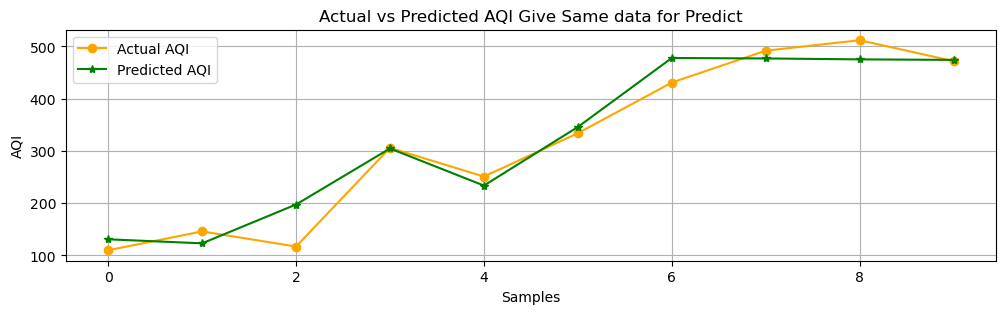

In [47]:
sample = np.arange(0,10)
plt.figure(figsize=(12,3))
plt.plot(sample,K,label='Actual AQI', color='orange', marker='o')
plt.plot(sample,R,label='Predicted AQI', color='green', marker='*')
plt.title('Actual vs Predicted AQI Give Same data for Predict')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**Actual vs Future Predicted AQI 2025 Nov(01 to 10)**

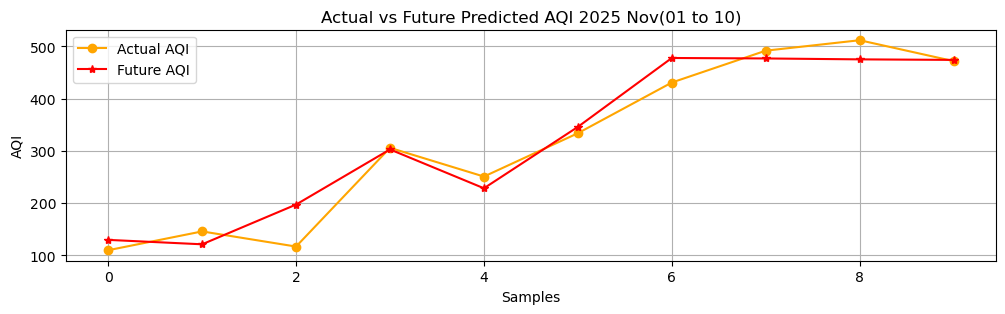

In [48]:
sample = np.arange(0,10)
plt.figure(figsize=(12,3))
plt.plot(sample,K,label='Actual AQI', color='orange', marker='o')
plt.plot(sample,N,label='Future AQI', color='red', marker='*')
plt.title('Actual vs Future Predicted AQI 2025 Nov(01 to 10)')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()